<h1><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Whereever applicable your solution will be graded based on the **plots**, generated by
**your code** on **TA's** computer.

<br/> <!--Intentionally left blank-->

# Home Assignment -- 5

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

# Part 2 (19 + 10  pt.): Clustering

<br/> <!--Intentionally left blank-->

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

<br/> <!--Intentionally left blank-->

## Task 1 (11 + 4 pt.): Practice with Different Clustering Algorithms

In this task you are asked to try different clustering algorithms from sklearn on the provided data

True number of clusters is 15


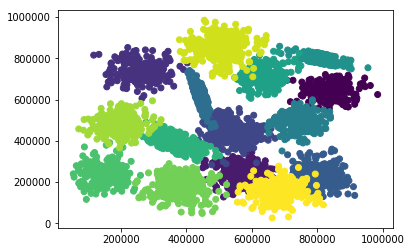

In [2]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))

plt.scatter(points[:,0], points[:,1], c=labels)
plt.show()

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *adjusted mutual information*.

For each algorithm **your task** is to
1. **(4 pt.)** Try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`; **use these parameters hereafter**;
2. **(4 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
3. **(3 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

<span style="color:green">**Bonus**</span>
You get extra **+4 pt.** if you produce all your plots in one place and make as few
visualizations as possible (counting subplots). This means that you should depict the
comparison in a clear and comprehensible, yet concise manner.

**HINT** <span style="/*color:white;*/" title="select all">If plots cloud somehow overlay
one another and not sit side by side or in different cells...</span>

In [3]:
### BEGIN Solution
import tqdm
random_state = 42
true_number_of_clusters = 15
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score as ami

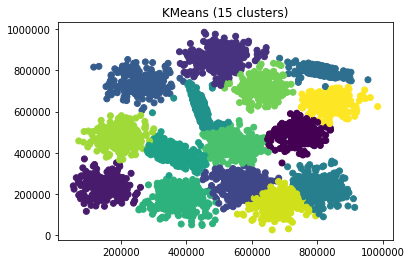

Silhouette score =  0.62620425
            AMI  =  0.9458792621941577


In [4]:
#Kmeans
kmeans = KMeans(n_clusters=true_number_of_clusters, random_state=random_state)
labels_kmeans = kmeans.fit_predict(points)
plt.scatter(points[:,0], points[:,1], c=labels_kmeans)
plt.title("KMeans (15 clusters)")
plt.show()
s_score_kmeans = silhouette_score(points, labels_kmeans)
ami_score_kmeans = ami(labels,labels_kmeans)
print ("Silhouette score = ", s_score_kmeans.round(8))
print ("            AMI  = ", ami_score_kmeans)

 90%|█████████ | 9/10 [00:10<00:01,  1.16s/it]

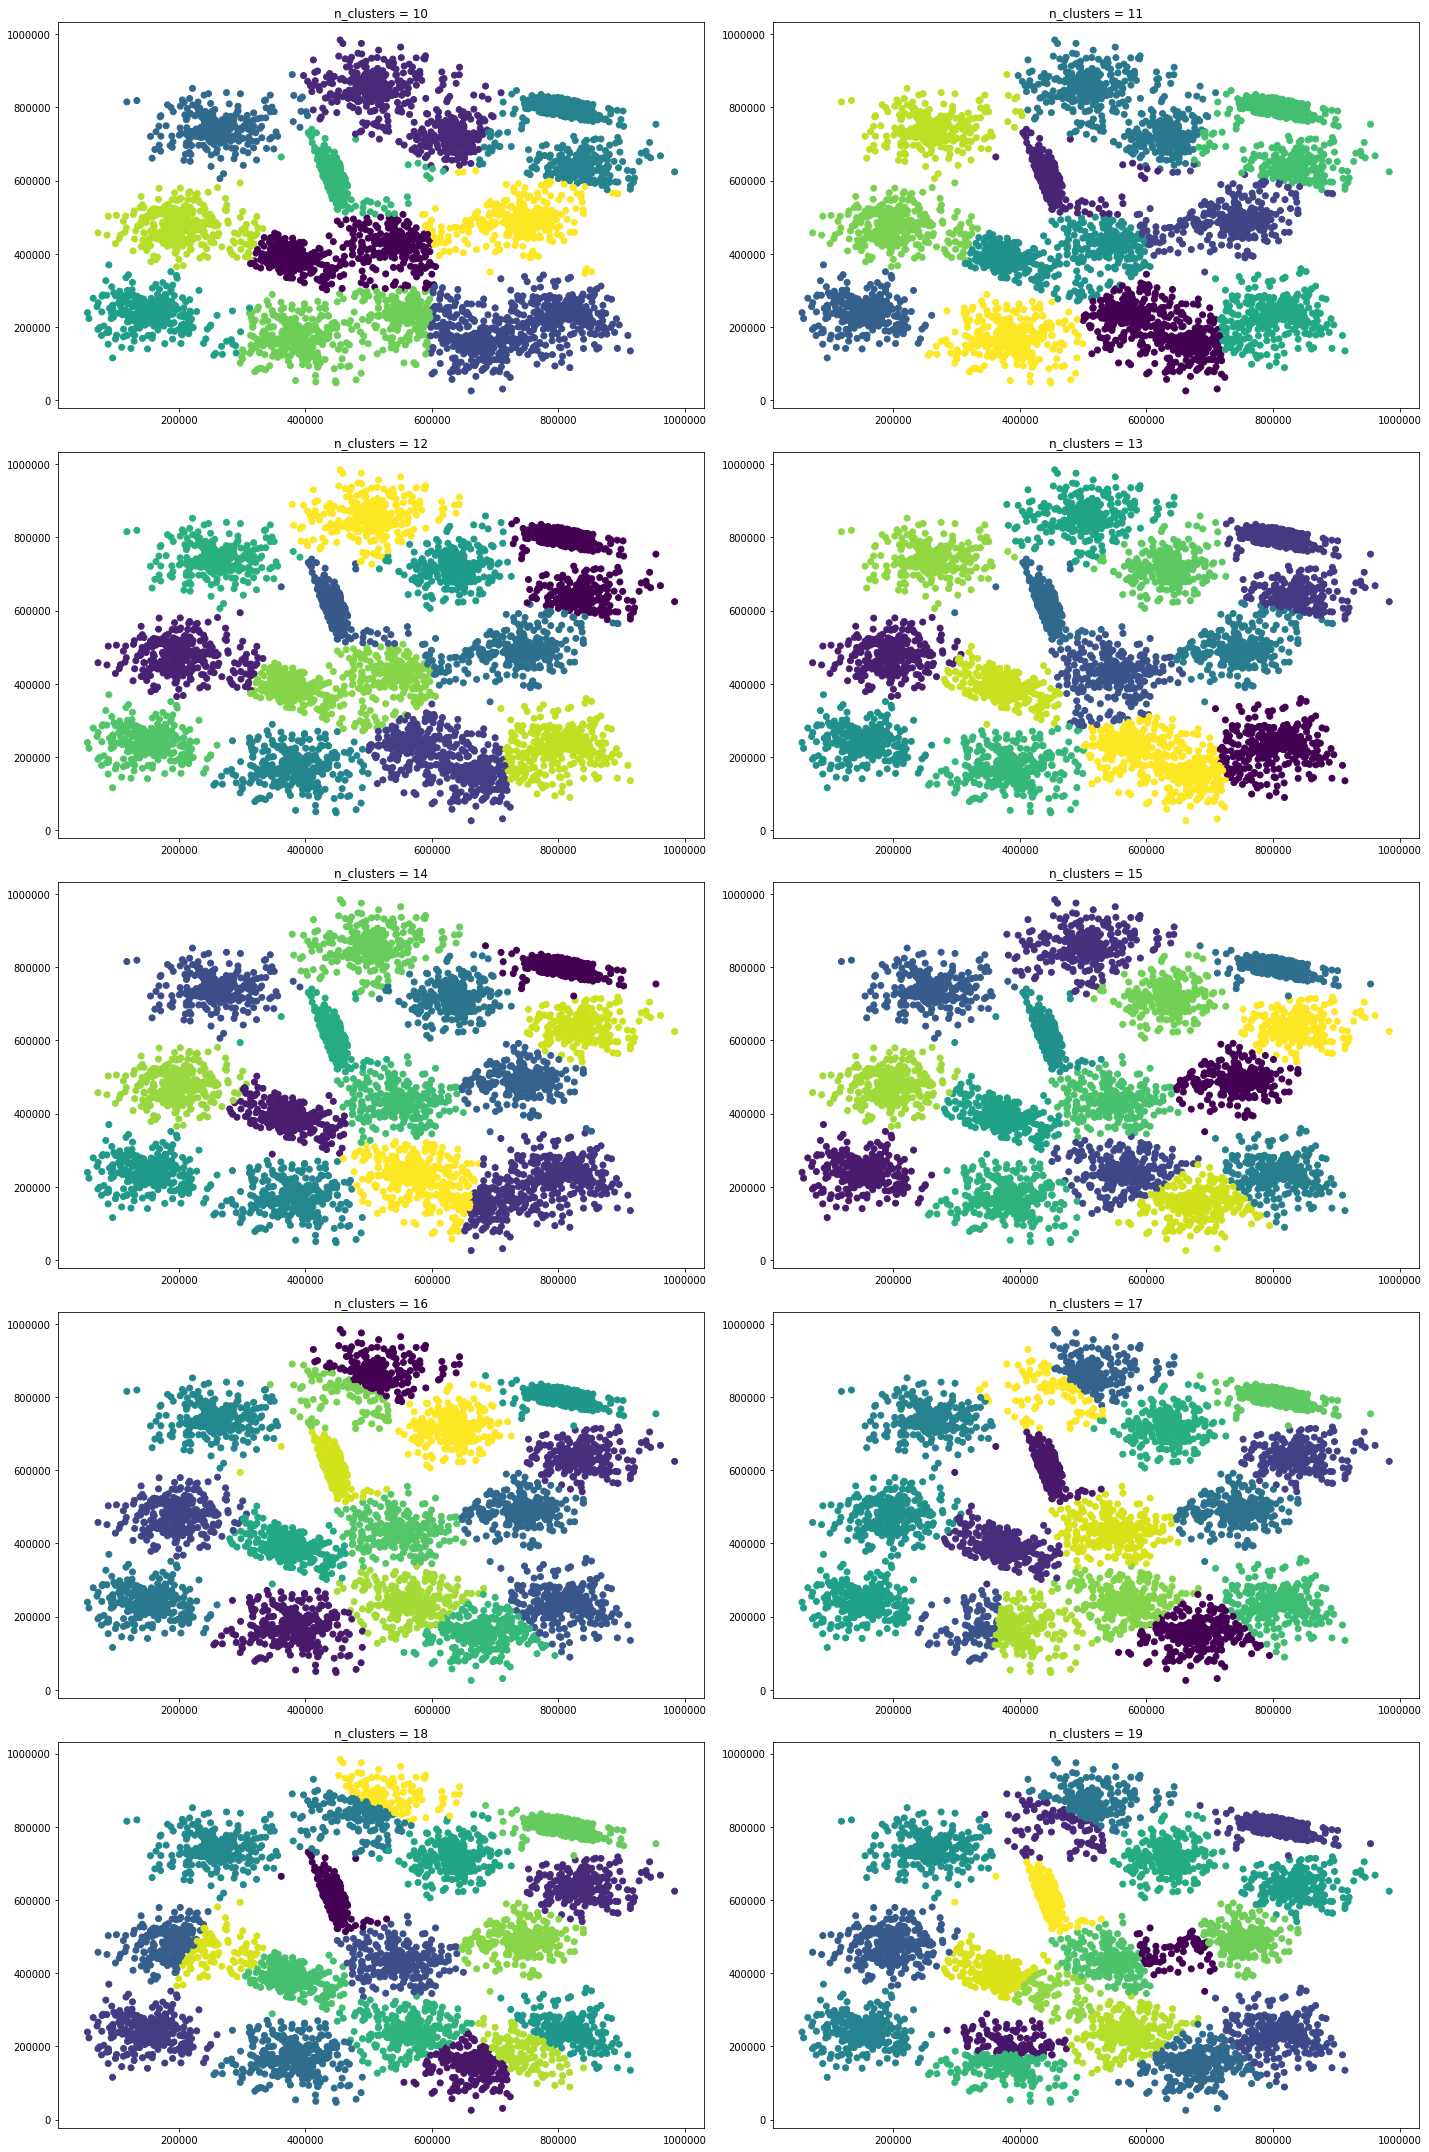

In [5]:
n_clusters = range(10,20)
s_scores_kmeans = []
ami_scores_kmeans = []

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 30))
for ax, n in zip(axes.flat, tqdm.tqdm(n_clusters)):
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    labels_kmeans_n = kmeans.fit_predict(points)
    s_scores_kmeans.append(silhouette_score(points, labels_kmeans_n))
    ami_scores_kmeans.append(ami(labels,labels_kmeans_n))
    ax.scatter(points[:, 0], points[:, 1], c=labels_kmeans_n)
    ax.set_title("n_clusters = {}".format(n))
plt.tight_layout()
plt.show()

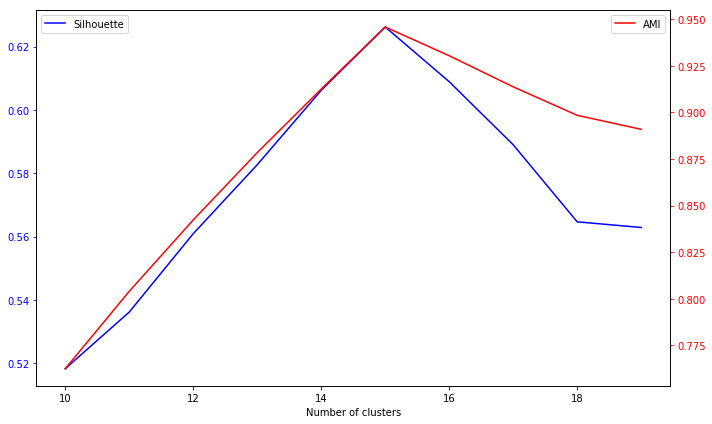

In [6]:
#scores
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(n_clusters, s_scores_kmeans, 'b', label='Silhouette')
ax1.set_xlabel('Number of clusters')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(n_clusters, ami_scores_kmeans, 'r',label = 'AMI')
ax2.tick_params('y', colors='r')

fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

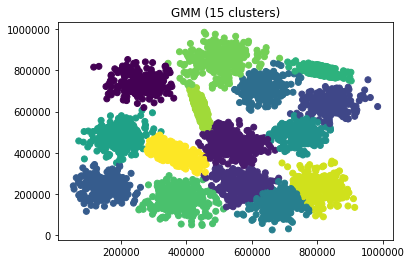

Silhouette score =  0.62265094
            AMI  =  0.9486246523728157


In [7]:
#GMM
gmm = GaussianMixture(n_components=15, random_state=random_state, tol=1e-4)
gmm.fit(points)
labels_gmm = gmm.predict(points)
plt.scatter(points[:,0], points[:,1], c=labels_gmm)
plt.title("GMM (15 clusters)")
plt.show()
s_score_gmm = silhouette_score(points, labels_gmm)
ami_score_gmm = ami(labels,labels_gmm)
print ("Silhouette score = ", s_score_gmm.round(8))
print ("            AMI  = ", ami_score_gmm)


 90%|█████████ | 9/10 [00:09<00:01,  1.08s/it]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/nurlan/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/nurlan/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/nurlan/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




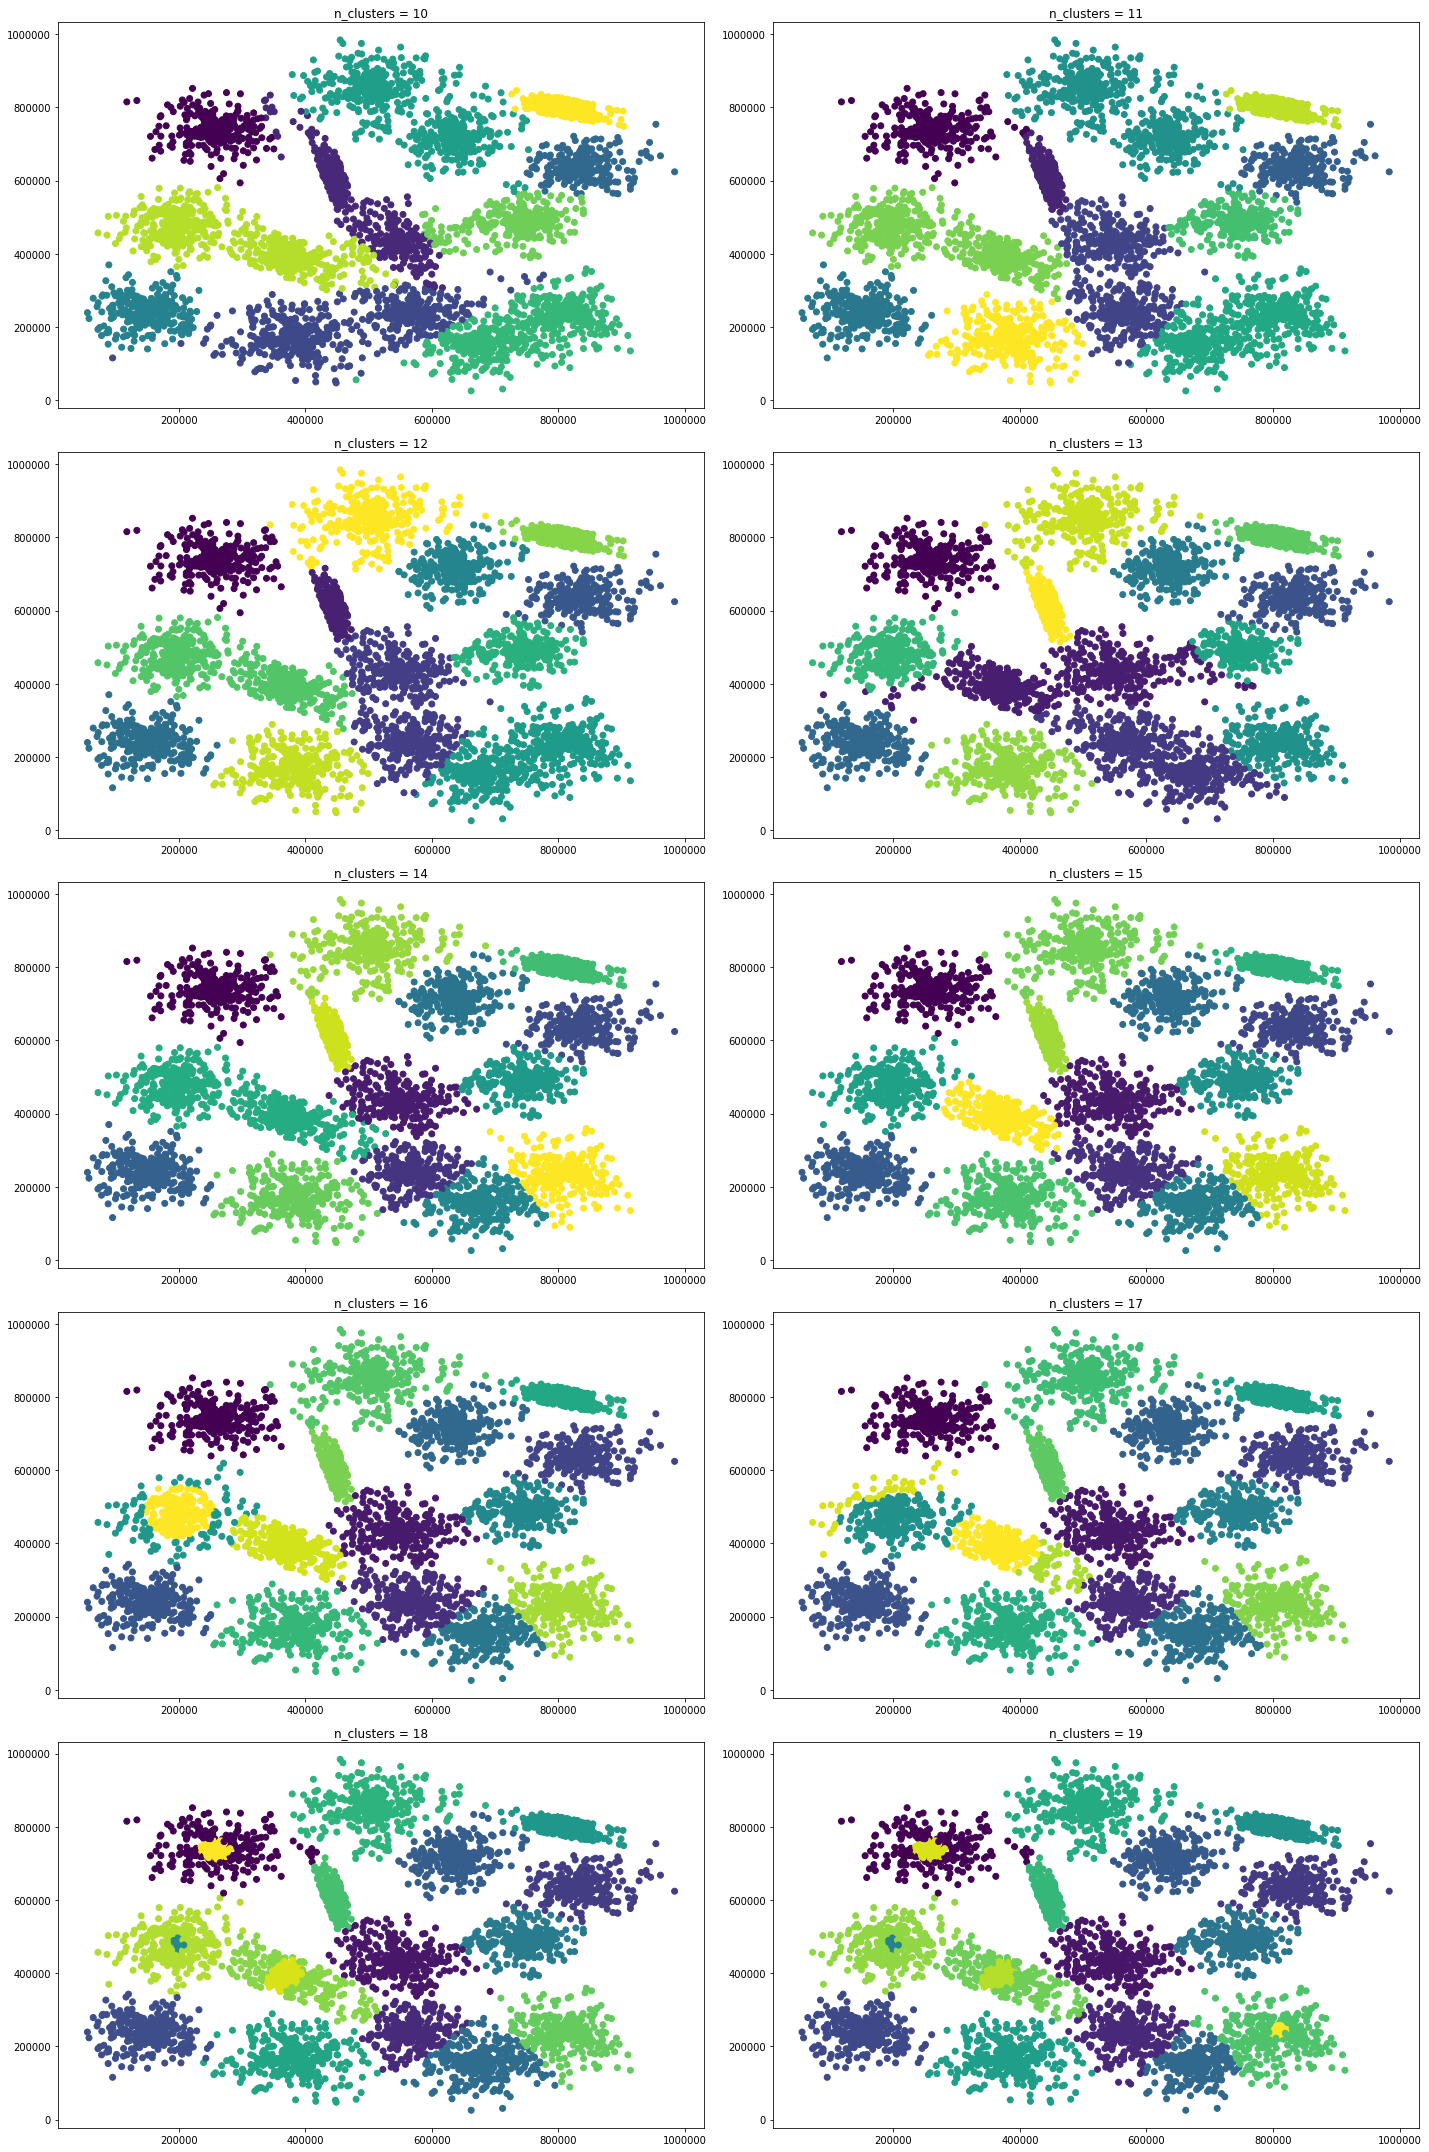

In [8]:
n_clusters = range(10,20)
s_scores_gmm = []
ami_scores_gmm = []

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 30))
for ax, n in zip(axes.flat, tqdm.tqdm(n_clusters)):
    gmm = GaussianMixture(n_components=n,random_state=random_state, tol=1e-4)
    gmm.fit(points)
    labels_gmm_n = gmm.predict(points)
    s_scores_gmm.append(silhouette_score(points, labels_gmm_n))
    ami_scores_gmm.append(ami(labels,labels_gmm_n))
    ax.scatter(points[:, 0], points[:, 1], c=labels_gmm_n)
    ax.set_title("n_clusters = {}".format(n))
plt.tight_layout()
plt.show()

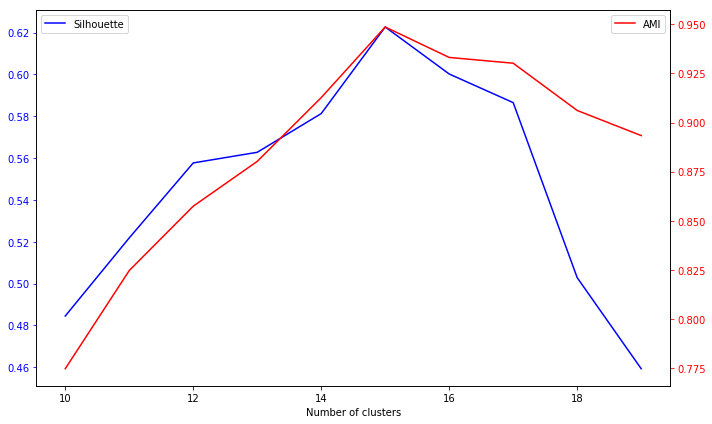

In [9]:
#scores
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(n_clusters, s_scores_gmm, 'b', label='Silhouette')
ax1.set_xlabel('Number of clusters')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(n_clusters, ami_scores_gmm, 'r',label = 'AMI')
ax2.tick_params('y', colors='r')

fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

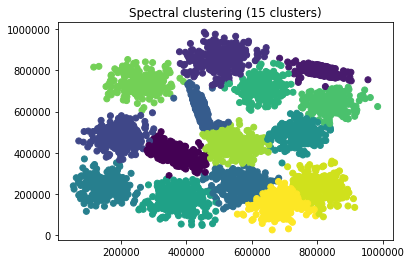

Silhouette score =  0.62625125
            AMI  =  0.9474458531535832


In [10]:
#Spectral clustering
import warnings
sc = SpectralClustering(n_clusters=15, random_state=random_state,eigen_solver='arpack', affinity="nearest_neighbors",
                        n_neighbors=200, n_jobs=-1)
warnings.filterwarnings("ignore", message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",category=UserWarning)
sc.fit(points)

labels_sc = sc.labels_.astype(np.int)
plt.scatter(points[:,0], points[:,1], c=labels_sc)
plt.title("Spectral clustering (15 clusters)")
plt.show()
s_score_sc = silhouette_score(points, labels_sc)
ami_score_sc = ami(labels,labels_sc)
print ("Silhouette score = ", s_score_sc.round(8))
print ("            AMI  = ", ami_score_sc)

 90%|█████████ | 9/10 [00:29<00:03,  3.23s/it]

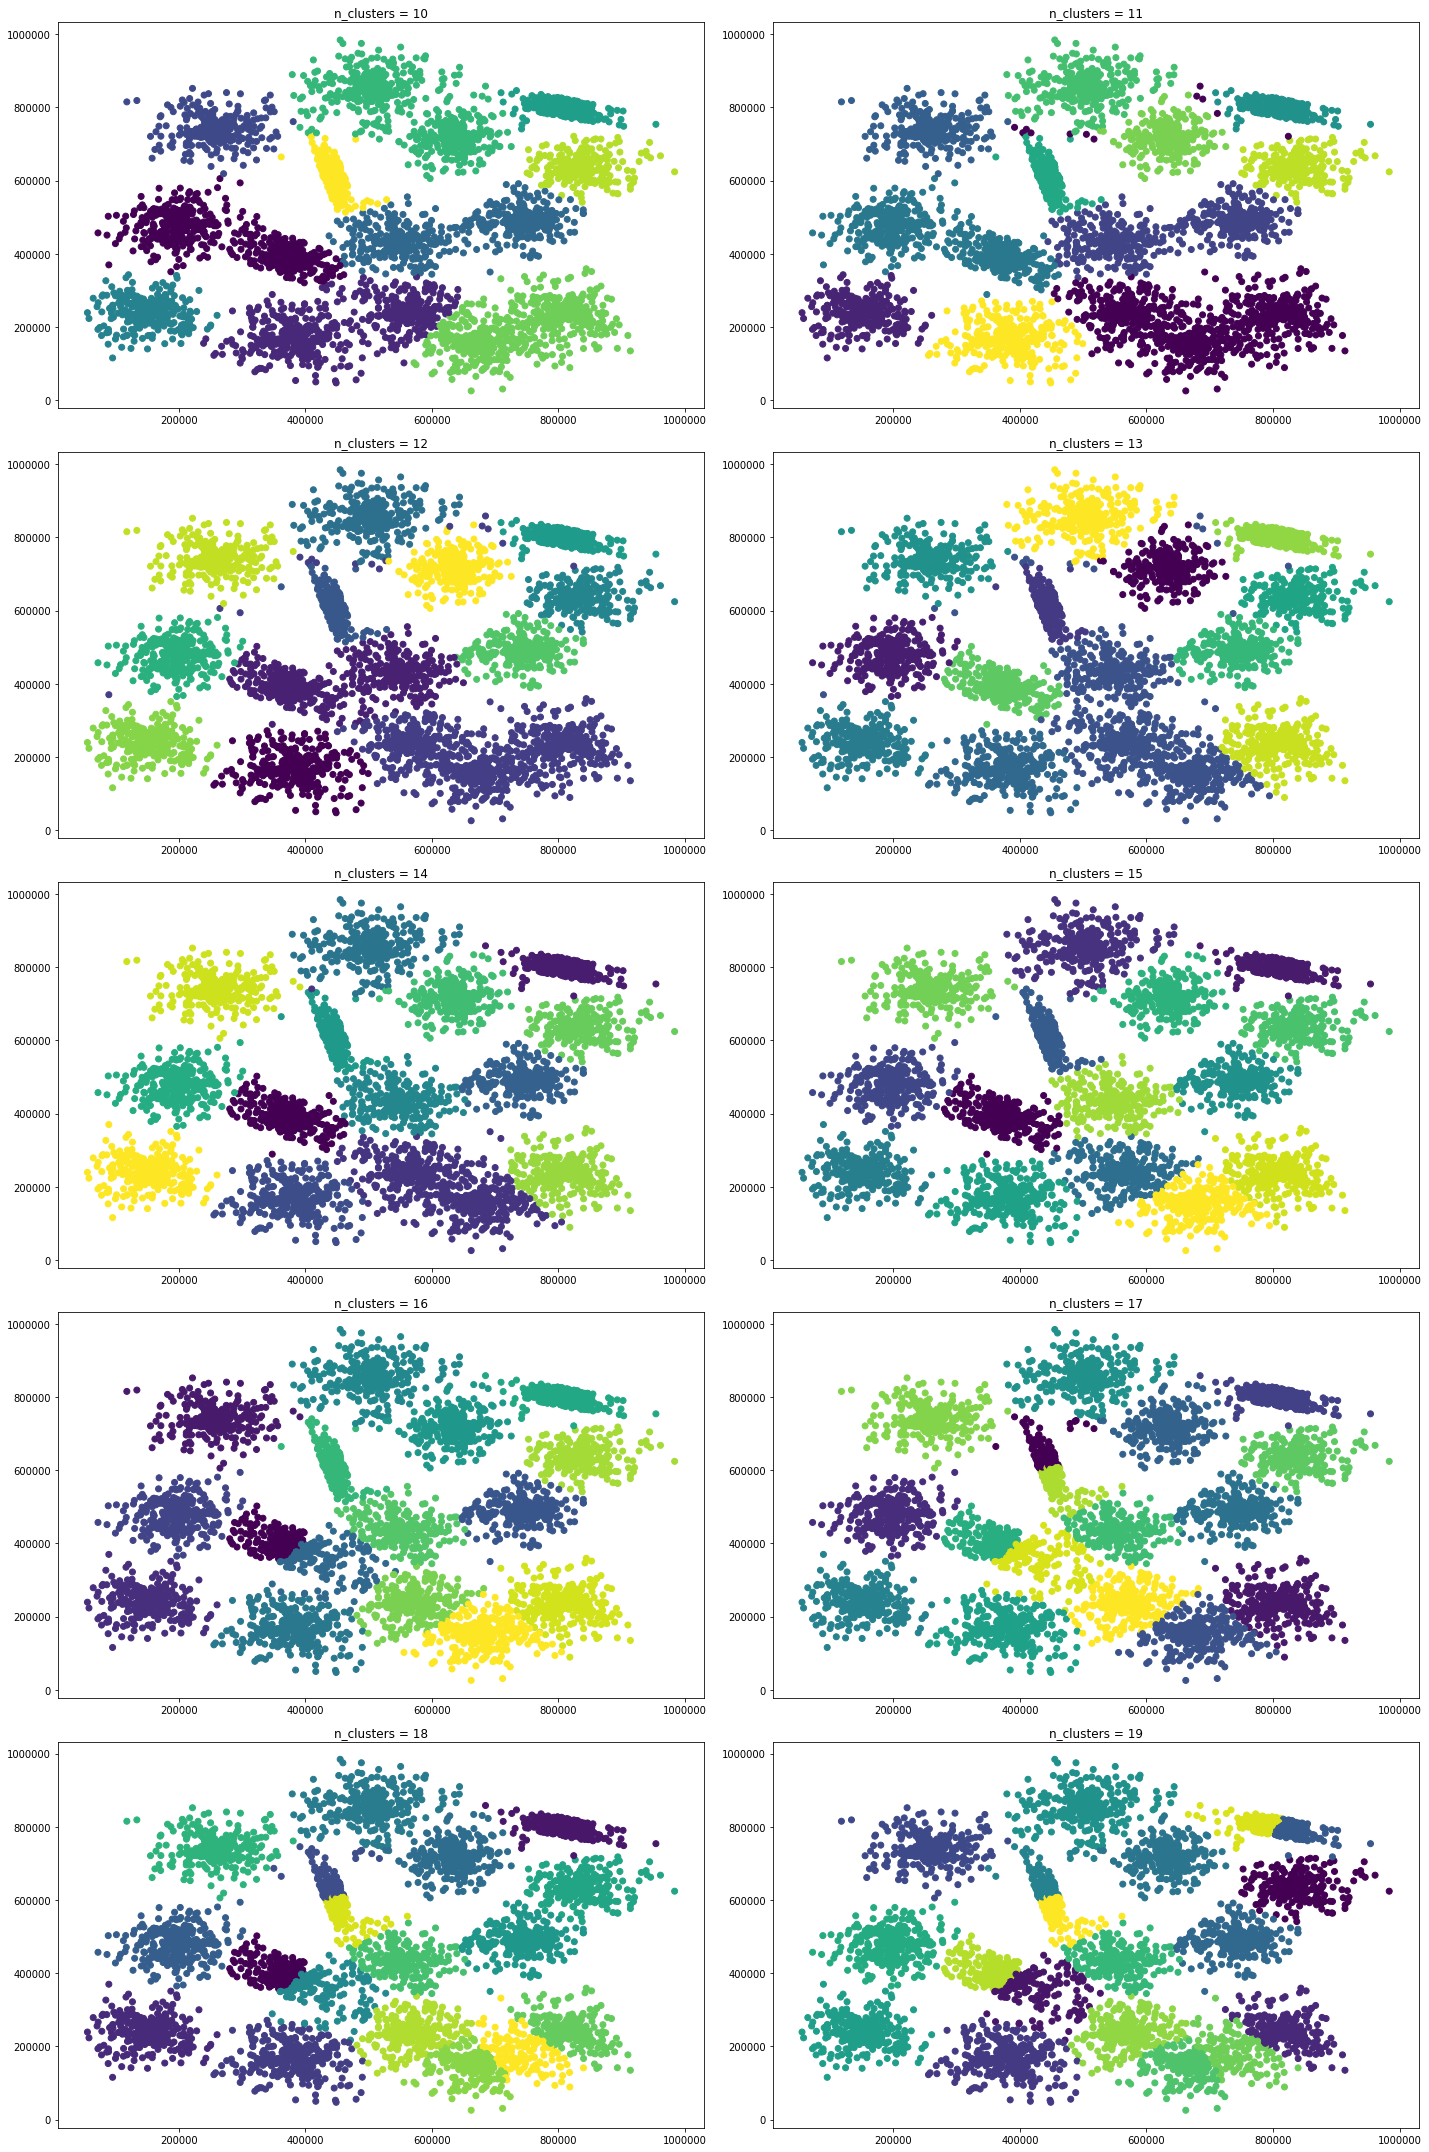

In [11]:
n_clusters = range(10,20)
s_scores_sc = []
ami_scores_sc = []

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 30))
for ax, n in zip(axes.flat, tqdm.tqdm(n_clusters)):
    sc = SpectralClustering(n_clusters=n, random_state=random_state,eigen_solver='arpack', 
                            affinity="nearest_neighbors",n_neighbors=200)
    sc.fit(points)
    labels_sc_n = sc.labels_.astype(np.int)
    s_scores_sc.append(silhouette_score(points, labels_sc_n))
    ami_scores_sc.append(ami(labels,labels_sc_n))
    ax.scatter(points[:, 0], points[:, 1], c=labels_sc_n)
    ax.set_title("n_clusters = {}".format(n))
plt.tight_layout()
plt.show()

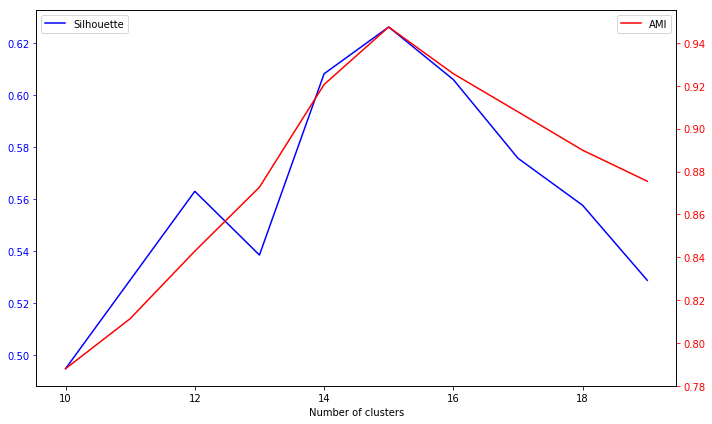

In [12]:
#scores
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(n_clusters, s_scores_sc, 'b', label='Silhouette')
ax1.set_xlabel('Number of clusters')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(n_clusters, ami_scores_sc, 'r',label = 'AMI')
ax2.tick_params('y', colors='r')

fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

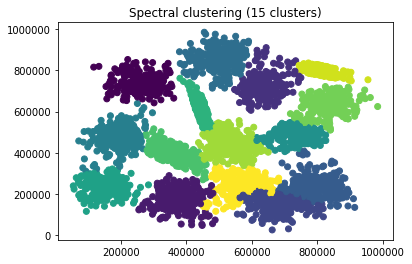

Silhouette score =  0.60917724
            AMI  =  0.9302134838982679


In [13]:
#Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=15,linkage='average')
ac.fit(points)

labels_ac = ac.labels_.astype(np.int)
plt.scatter(points[:,0], points[:,1], c=labels_ac)
plt.title("Spectral clustering (15 clusters)")
plt.show()
s_score_ac = silhouette_score(points, labels_ac)
ami_score_ac = ami(labels,labels_ac)
print ("Silhouette score = ", s_score_ac.round(8))
print ("            AMI  = ", ami_score_ac)


 10%|█         | 1/10 [00:01<00:10,  1.13s/it]
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/nurlan/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/nurlan/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/nurlan/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

 90%|█████████ | 9/10 [00:09<00:01,  1.03s/it]


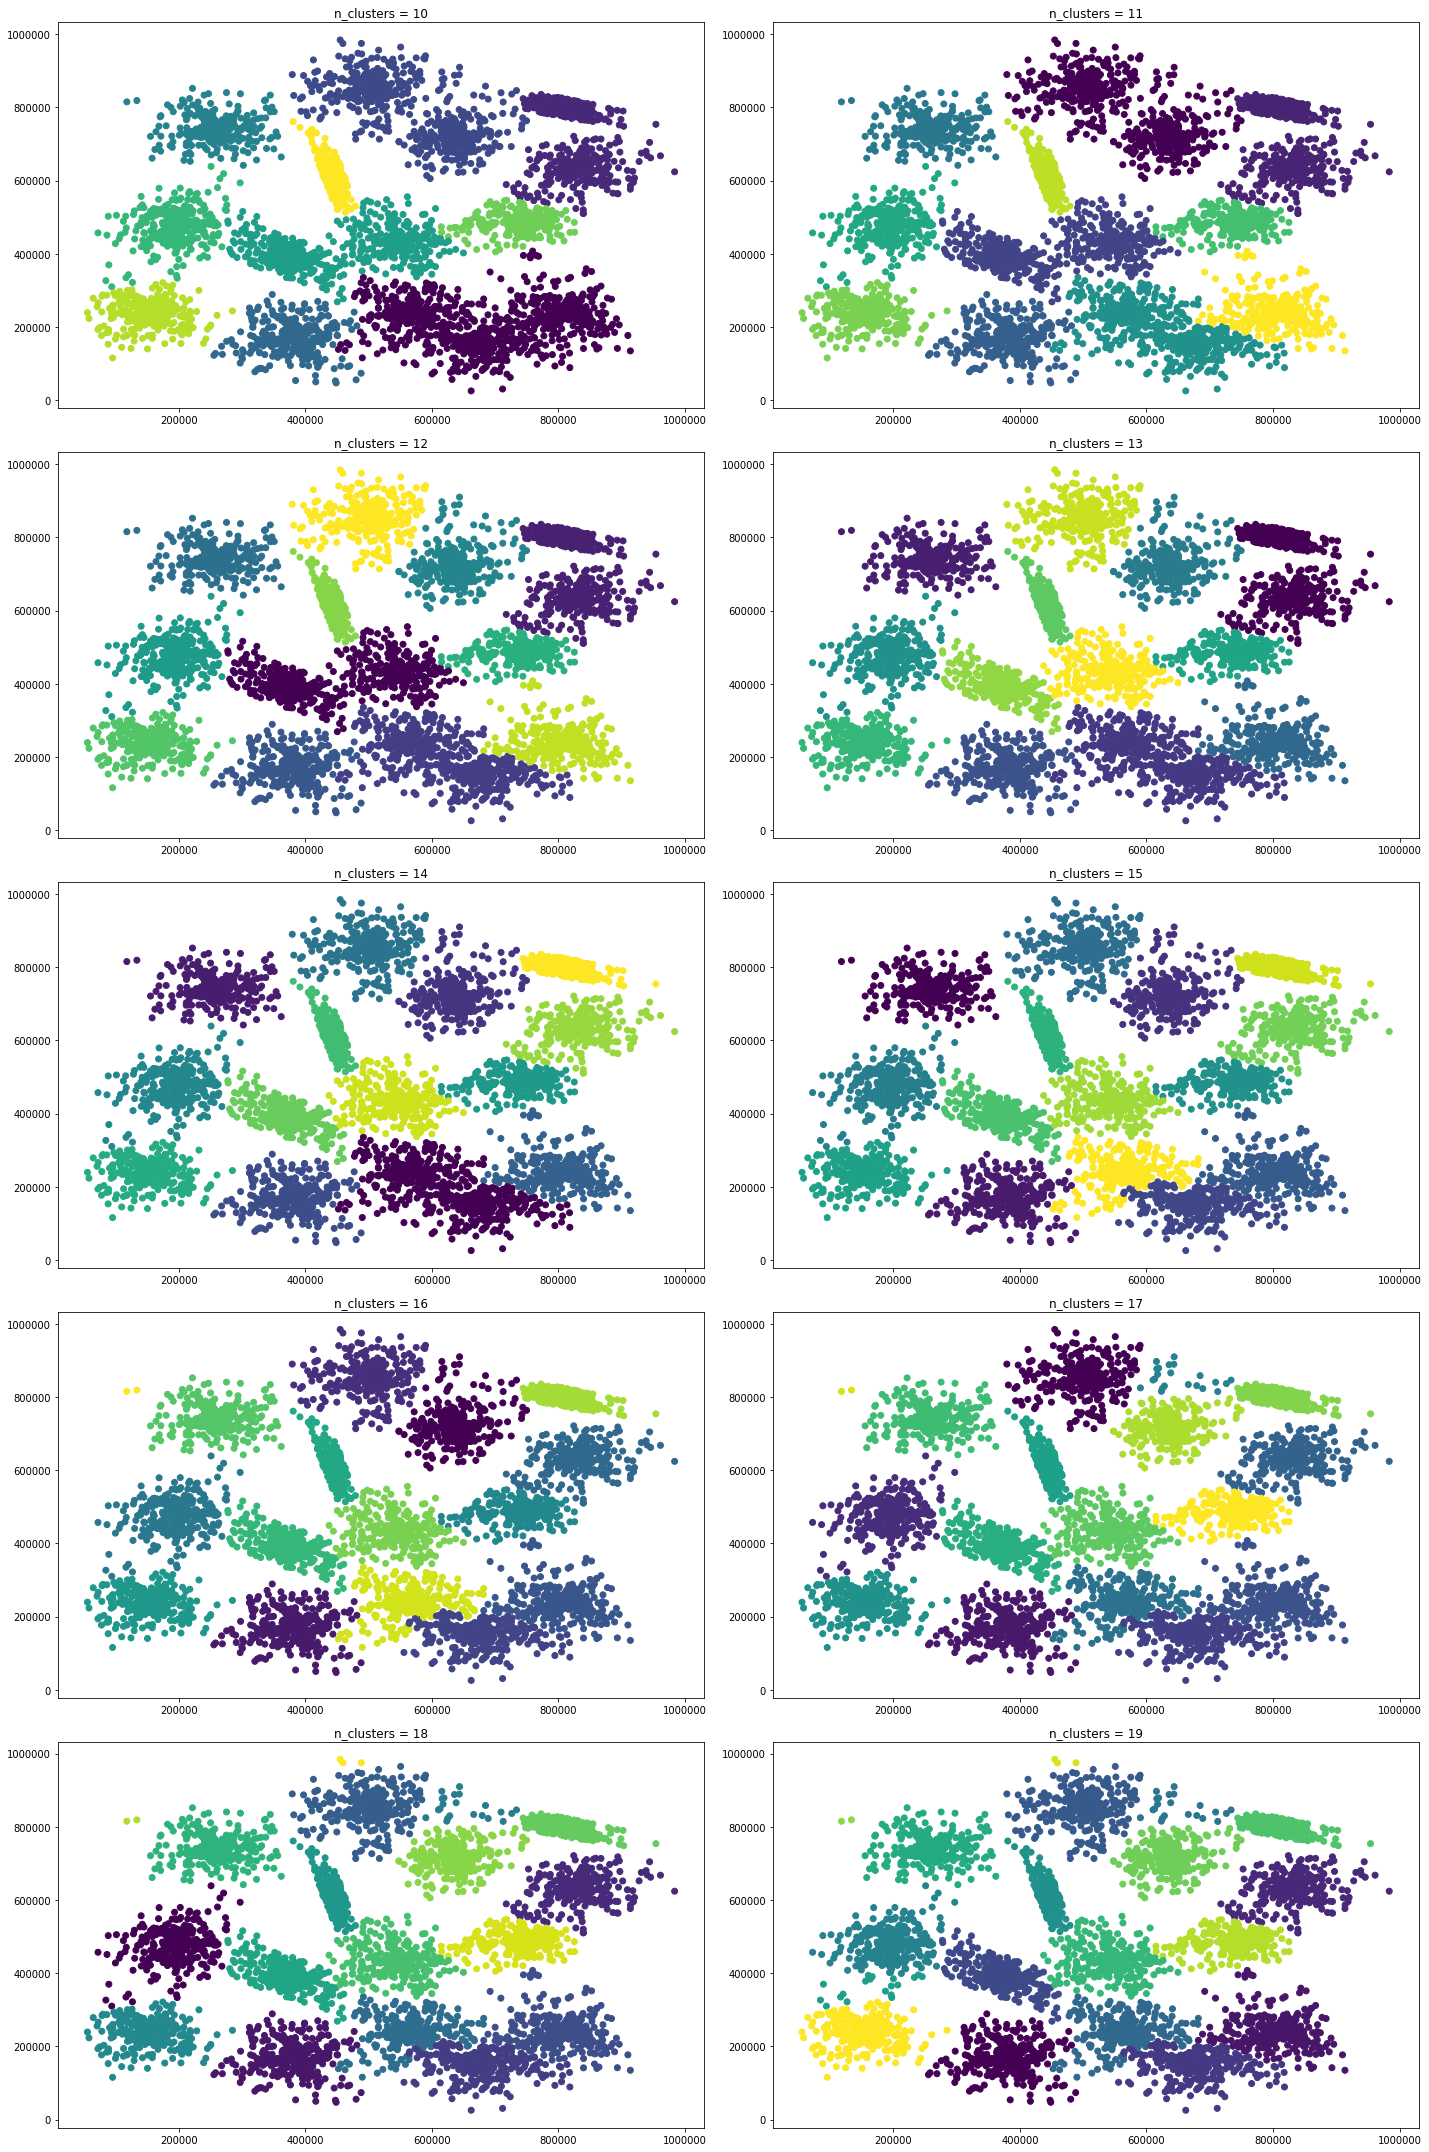

In [14]:
n_clusters = range(10,20)
s_scores_ac = []
ami_scores_ac = []

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(20, 30))
for ax, n in zip(axes.flat, tqdm.tqdm(n_clusters)):
    ac = AgglomerativeClustering(n_clusters=n,linkage='average')
    ac.fit(points)
    labels_ac_n = ac.labels_.astype(np.int)
    s_scores_ac.append(silhouette_score(points, labels_ac_n))
    ami_scores_ac.append(ami(labels,labels_ac_n))
    ax.scatter(points[:, 0], points[:, 1], c=labels_ac_n)
    ax.set_title("n_clusters = {}".format(n))
plt.tight_layout()
plt.show()

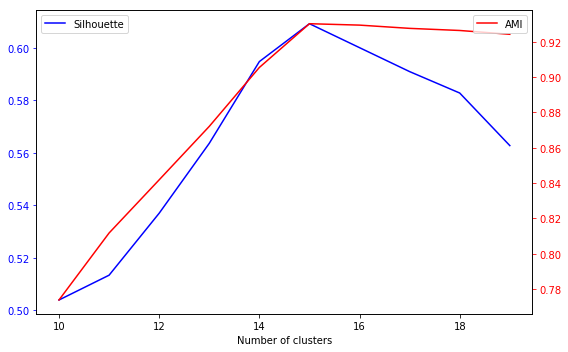

In [15]:
#scores
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.plot(n_clusters, s_scores_ac, 'b', label='Silhouette')
ax1.set_xlabel('Number of clusters')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(n_clusters, ami_scores_ac, 'r',label = 'AMI')
ax2.tick_params('y', colors='r')

fig.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.show()

## Comparison:

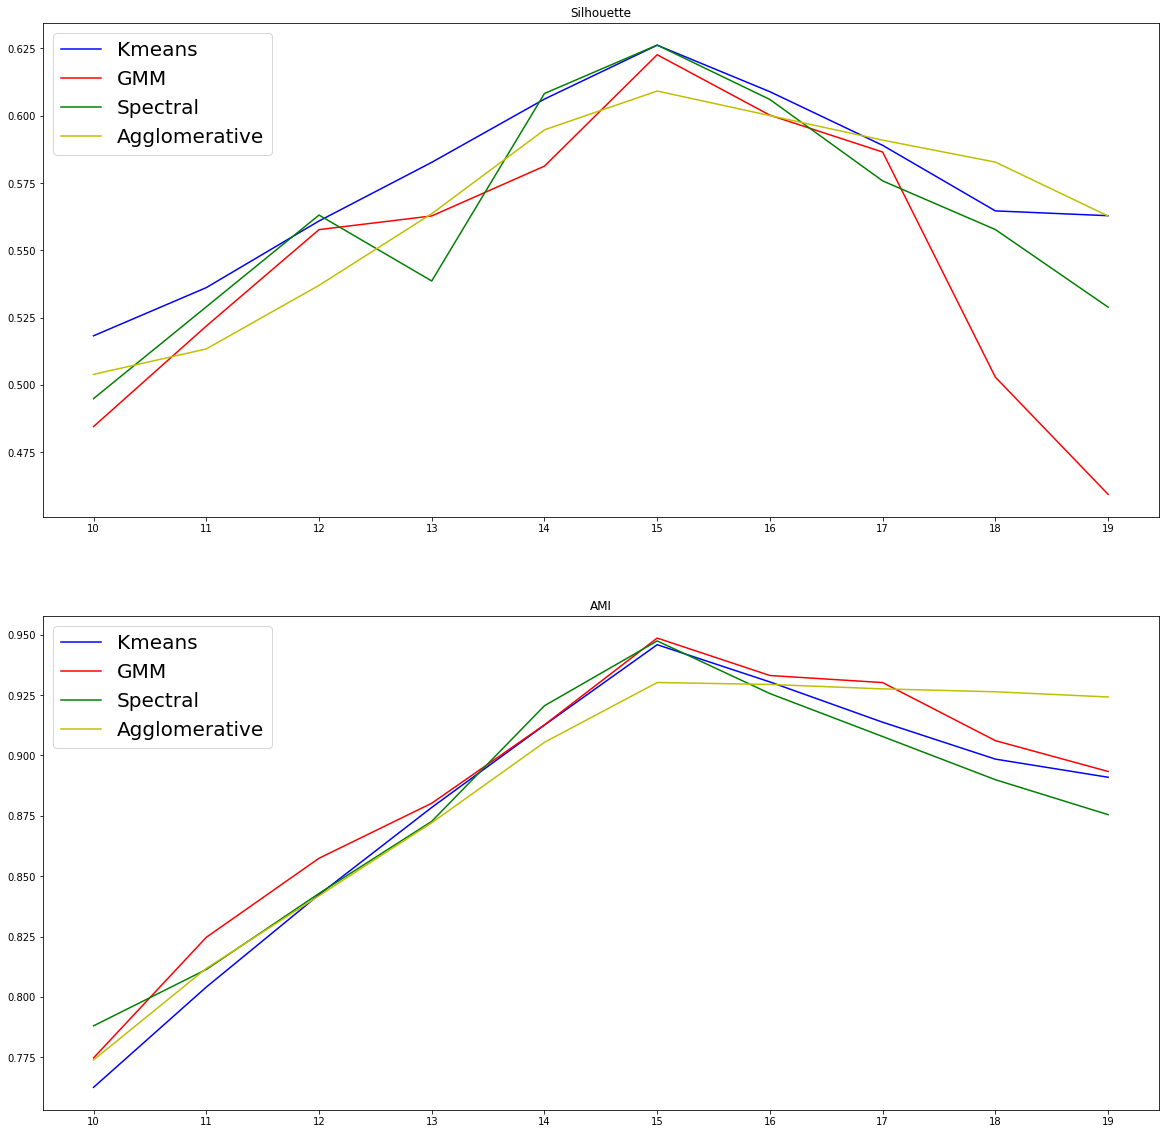

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(20, 20))

ax1.plot(n_clusters, s_scores_kmeans, color = 'b', label='Kmeans')
ax1.plot(n_clusters, s_scores_gmm,color = 'r', label='GMM')
ax1.plot(n_clusters, s_scores_sc,color = 'g', label='Spectral')
ax1.plot(n_clusters, s_scores_ac,color = 'y', label='Agglomerative')
ax1.set_xticks(n_clusters)
ax1.set_title("Silhouette")
ax1.legend(loc=2,prop={'size': 20})

ax2.plot(n_clusters, ami_scores_kmeans, color = 'b', label='Kmeans')
ax2.plot(n_clusters, ami_scores_gmm,color = 'r', label='GMM')
ax2.plot(n_clusters, ami_scores_sc,color = 'g', label='Spectral')
ax2.plot(n_clusters, ami_scores_ac,color = 'y', label='Agglomerative')
ax2.set_title("AMI")
ax2.legend(loc=2,prop={'size': 20})
ax2.set_xticks(n_clusters)

plt.show()

In [17]:
### END Solution

<br/> <!--Intentionally left blank-->

## Task 2 (8 + 6 pt.): Finding the Number of Clusters with Bootstrap

For a chosen algorithm find the best number of clusters using bootstrap.

So first based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**. Justify your choice. **(1 pt.)**

**BEGIN Solution**

<!-- >>> your derivation here <<< -->
If I don't have true labels and don't know the true number of clusters, I would analize Silhouette comparison plot. It indicates that for almost all given numbers of clusters (from confident range) KMeans clusterization gives better result (in Internal measure: Silhouette Coefficient), because blue plot is higher than others. So if i randomly choose number of clusters KMeans would give me the best result among these four algorithms.Therefore I suppose KMeans is the most competitive algorithm in this case. I will use KMeans to determine the best number of clusters.

**END Solution**

**Your task** is to
1. **(2 pt.)** For each bootstrap sample perform clusterization and calculate **silhouette score**;
2. **(3 pt.)** Estimate variance of the metric and construct normal 95% **confidence intervals**;
3. **(2 pt.)** **Plot the metric** with the corresponding confidence intervals and chose the best number of clusters.

**Bonus** You may get extra **+2 pt.** if **in addition to** the silhouette score you use
**another metric** and **justify your choice of the algorithm**.
If you choose the [Gap statistic](https://web.stanford.edu/~hastie/Papers/gap.pdf),
*correctly implement and apply* it, you get extra **+4 pt.**.

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

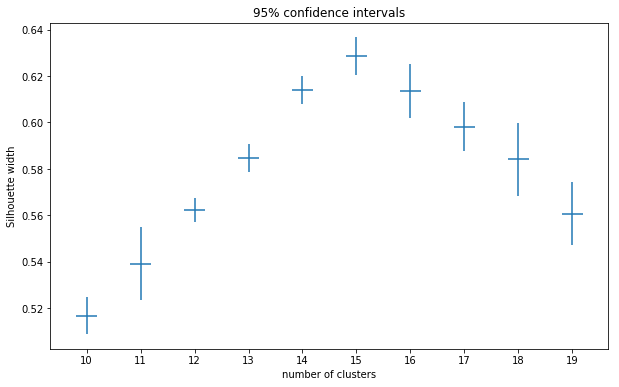

In [18]:
from tqdm import tqdm_notebook

### BEGIN Solution

cluster_ns = range(10,20)
sample_number = 5
points_b = []
# >>> your code here <<<
def make_sample_bootstrap(X):
    size = X.shape[0]
    idx_range = range(size)
    new_idx = np.random.choice(idx_range, size, replace=True)
    return X[new_idx]

for i in range(sample_number):
    points_b.append(make_sample_bootstrap(points))

means = []
stds = []
for i_cn, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # >>> your code here <<<
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    scores = []
    for sample_index in tqdm_notebook(range(sample_number)):
        # >>> your code here <<<
        X = points_b[sample_index]
        labels_b = kmeans.fit_predict(X)
        s_score = silhouette_score(X,labels_b)
        scores.append(s_score)  
        
    # >>> your code here <<<
    mean = np.mean(np.array(scores))
    std = 1.96 * np.array(scores).std()  # 95% of cases in a normal distribution sit within 1.96
                                        # standard deviations from the mean (bootstrap + LLN)
    means.append(mean)
    stds.append(std)
# >>> your code here <<<
plt.figure(figsize=(10,6))
plt.errorbar(cluster_ns, means, xerr=0.2, yerr=stds, linestyle='')
plt.xlabel("number of clusters")
plt.ylabel("Silhouette width")
plt.title("95% confidence intervals")
plt.xticks(cluster_ns)
plt.show()

### END Solution

Number of clusters = 15

### Elbow method (with sum of distances for centers of clusters as metric)

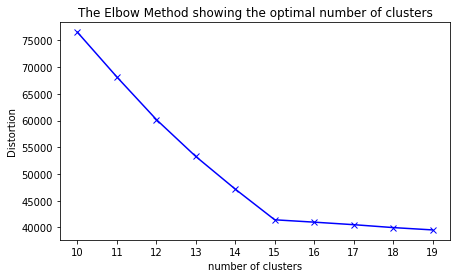

In [19]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
n_clusters = range(10,20)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=random_state)
    kmeans.fit(points)
    distortions.append(sum(np.min(cdist(points, kmeans.cluster_centers_, 'euclidean'), axis=1)) / points.shape[0])

#plotting
plt.figure(figsize=(7,4))
plt.plot(n_clusters, distortions, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.xticks(n_clusters)
plt.show()

Number of clusters = 15

### GAP Statistics

Algorithm:

<i>Step 1: </i> Cluster the observed data, varying the number of clusters from $k = 1, ..., k_{\mathrm{max}}$, and compute the corresponding $W_k$.

<i>Step 2: </i>Generate B reference data sets and cluster each of them with varying number of clusters $k = 1, ..., k_{\mathrm{max}}$. Compute the estimated gap statistic $\mathrm{Gap}(k) = \frac{1}{B} \sum_{b=1}^B \log W^*_{kb} - \log W_k$.

<i>Step 3: </i>With $\bar{w} = \frac{1}{B} \sum_b \log W^*_{kb} = \mathbb{E}\log W^*_{kb}$, compute the standard deviation $\mathrm{sd}(k) = \left[\frac{1}{B} \sum_b (\log W^*_{kb} - \bar{w})^2\right]^{1/2} = \sqrt{\mathbb{V}\log W^*_{kb}}$ and define $\displaystyle s_k = \sqrt{1+\frac{1}{B}}\,\mathrm{sd}(k)$.

<i>Step 4: </i>Choose the number of clusters as the smallest k such that $\mathrm{Gap}(k) \geq \mathrm{Gap}(k+1) - s_{k+1}$.

In [20]:
def find_W(data, centers, labels, n):
    """
    Calculates W_k
    Params:
        data: ndarry of shape (n_samples, n_features)
        centers: centers of clusters 
        labels: labels of points
        n: number of clusters
    Returns: (W_k)
    """
    return np.sum([np.sum(cdist(data[labels==i],data[labels==i],'euclidean')**2)/(2*data[labels==i].shape[0])
                   for i in range(n)])

def Gap_k(data, n_samples=5, min_Clusters=10, maxClusters=20):
    """
    Calculates Optimal numebr of clusters
    Params:
        data: ndarry of shape (n_samples, n_features)
        n_samples: number of reference samples
        min_Clusters: minimal number of Clusters
        max_Clusters: maximal number of Clusters
    Returns: (optimal_n, range(min_Clusters, maxClusters), Gaps, Standart deviation of gaps)
    """
    xmin = np.min(data[:,0])
    xmax = np.max(data[:,0])
    ymin = np.min(data[:,1])
    ymax = np.max(points[:,1])
    gaps = np.zeros((len(range(min_Clusters, maxClusters)),))
    result_clusters = []
    result_gaps = []
    result_std = []
    for gap_index,n in tqdm_notebook(enumerate(range(min_Clusters, maxClusters))):
        
        #Step 1
        kmeans = KMeans(n, random_state=random_state)
        kmeans.fit(data)
        #We have euclidean metrics -> can just use inertia which is sum of sum of squared distances around the clusters
        Wk = kmeans.inertia_
        
        #Step2
        Wkb = np.zeros(n_samples)
    
        for i in tqdm_notebook(range(n_samples)):
            
            Sample = np.empty_like(data)
            Sample[:,0] = np.random.uniform(xmin,xmax,size=data.shape[0])
            Sample[:,1] = np.random.uniform(ymin,ymax,size=data.shape[0])
            
            kmeans = KMeans(n, random_state=random_state)
            kmeans.fit(Sample)
            
            Wkb_n = kmeans.inertia_
            Wkb[i] = Wkb_n
        
        #Step 3
        gap = np.mean(np.log(Wkb)) - np.log(Wk)

        gaps[gap_index] = gap
        
        result_std.append(np.std(np.log(Wkb)) * np.sqrt(1+1/n_samples))
        result_clusters.append(n)
        result_gaps.append(gap)
        K = -1
        #Step 4
        for i in range(len(result_clusters)-1):
            if (result_gaps[i] > result_gaps[i+1] - result_std[i+1]):
                K = i
                break
        
    return (result_clusters[K], result_clusters, result_gaps, result_std)  

In [21]:
k, lab, gaps, stds = Gap_k(points)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [22]:
print ('Optimal number of clusters is: ', k)

Optimal number of clusters is:  15


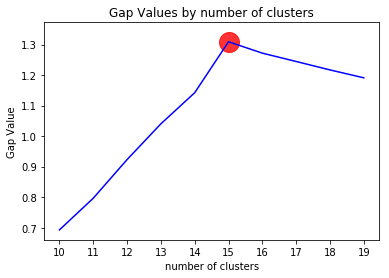

In [23]:
sigma = [i * 2 for i in stds]
plt.plot(lab, gaps, color = 'b')
#plt.errorbar(lab, gaps, xerr=0.1, yerr=sigma, color = 'b')
plt.scatter(15, gaps[5], color = 'r',s=400, alpha=0.8)
plt.xlabel('number of clusters')
plt.ylabel('Gap Value')
plt.title('Gap Values by number of clusters')
plt.xticks(lab)
plt.show()